# Probe sa ficerima

In [3]:
from ipyfilechooser import FileChooser
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

import parselmouth
import seaborn as sns
import os


In [4]:
fc = FileChooser()
fc.show_only_dirs = True
display(fc)

FileChooser(path='/Users/lenkavuckovic/Desktop/prepoznavanje emocija/lk-s-2023-prepoznavanje-emocija', filenam…

In [65]:
print(fc.selected)



None


In [66]:
samplerate, data = wavfile.read(fc.selected)
data
len(data)

TypeError: expected str, bytes or os.PathLike object, not NoneType

TypeError: can only concatenate str (not "NoneType") to str

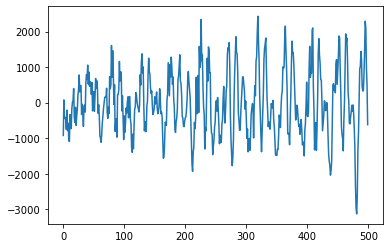

In [67]:
od = 10000
do = 10500
plt.plot(data[od:do])
plt.title("signal " + fc.selected_filename + " " + str(od) + " - " + str(do))
plt.xlabel("vreme[s]")
plt.ylabel("amplituda")
plt.show()

In [ ]:
len(data) * 1/samplerate

2.044125

---

### duzine svih fajlova iz foldera

In [5]:
fc = FileChooser()
fc.show_only_dirs = True
display(fc)

FileChooser(path='/Users/lenkavuckovic/Desktop/prepoznavanje emocija/lk-s-2023-prepoznavanje-emocija', filenam…

In [2]:
duzine1 = []
duzine2 = []

proseci1 = []
proseci2 = []

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort()

for file in lista_fajlova:
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 

          samplerate, data = wavfile.read(fc.selected + filename)
          duzina = len(data) * 1/samplerate

          suma = 0
          for i in data:
             suma += i
          # sm = sum(data)
          avg = suma/len(data);
          # print(suma)
          #W, L, E, A, F, T, N - emocije 

          
          emocija = filename[5]


          print(filename + ": Duzina: ", duzina, " [s] , avg: ", avg)

 

NameError: name 'fc' is not defined

In [ ]:
          
          # if emocija == 'T':
          #      duzine1.append(duzina)
          #      proseci1.append(avg)

          # elif emocija == 'W':
          #      duzine2.append(duzina)
          #      proseci2.append(avg)
               

          # elif emocija == 

In [70]:
duzine1
duzine2

[5.2993125,
 8.97825,
 4.09325,
 3.756375,
 5.905,
 5.9963125,
 4.97625,
 5.4973125,
 5.3410625,
 5.975625]

In [5]:
sns.set()

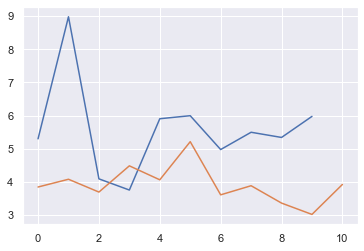

In [6]:
plt.plot(duzine1)
plt.plot(duzine2)


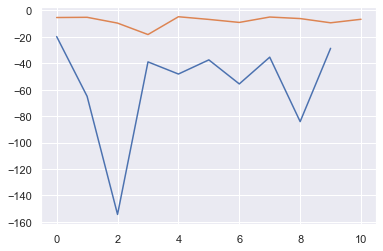

In [7]:
plt.plot(proseci1)
plt.plot(proseci2)

### koliko ima svake emocije ukupno i ostale informacije o tome
---

In [6]:
# importi
from ipyfilechooser import FileChooser
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

import parselmouth
import seaborn as sns
import os

In [ ]:
# biranje foldera
fc = FileChooser()
fc.show_only_dirs = True
display(fc)

In [ ]:
# prolazenje kroz sve fajlove u folderu

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort() # sortirano

for file in lista_fajlova:
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 

          samplerate, data = wavfile.read(fc.selected + filename)
          duzina = len(data) * 1/samplerate

          suma = 0
          for i in data:
             suma += i
          # sm = sum(data)
          avg = suma/len(data);
          # print(suma)
          #W, L, E, A, F, T, N - emocije 

          
          emocija = filename[5]


          print(filename + ": Duzina: ", duzina, " [s] , avg: ", avg)

 